In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df = pd.read_csv('/content/drive/MyDrive/k/NLP/capstone/Cleaned_data.csv',)
df.head()

,Unnamed: 0,Unnamed: 0.1,Short description,Description,Caller,Assignment group,SC + DC + Caller,Assignment RE-group,Cleaned,Length,Language
0,0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issuespxjnwir pjlcoqds-verified user det...,GRP_0,login issue verify user detail employee manage...,36,en
1,1,1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlookhmjdrvpb komuaywn\r\n\r\nreceived from:...,GRP_0,outlook hello team meeting skype meeting appea...,24,en
2,2,2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpneylqgodm ybqkwiam\r\n\r\nrec...,GRP_0,log vpn log vpn good,12,en
3,3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,xbkucsvz gcpydtequnable to access hr_tool page,GRP_0,unable access hr tool page,6,en
4,4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,owlgqjme qhcozdfxskype error,GRP_0,skype error,2,en


In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Short description', 'Description',
       'Caller', 'Assignment group', 'SC + DC + Caller', 'Assignment RE-group',
       'Cleaned', 'Length', 'Language'],
      dtype='object')

In [5]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [6]:
df.head(2)

,Short description,Description,Caller,Assignment group,SC + DC + Caller,Assignment RE-group,Cleaned,Length,Language
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issuespxjnwir pjlcoqds-verified user det...,GRP_0,login issue verify user detail employee manage...,36,en
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlookhmjdrvpb komuaywn\r\n\r\nreceived from:...,GRP_0,outlook hello team meeting skype meeting appea...,24,en


In [7]:
# Selecting the Groups having more than 100 Indiviual records
Counts = pd.DataFrame(df['Assignment group'].value_counts())
Others = []
for Group in df['Assignment group'].unique():
    if Counts.loc[Group][0] < 200:
        Others.append(Group)
print('{0} Groups in dataset have less than 200 samples'.format(len(Others)))

df['Assignment RE-group'] =df['Assignment group'].apply(lambda x: 'Others' if x in Others else x)

66 Groups in dataset have less than 200 samples


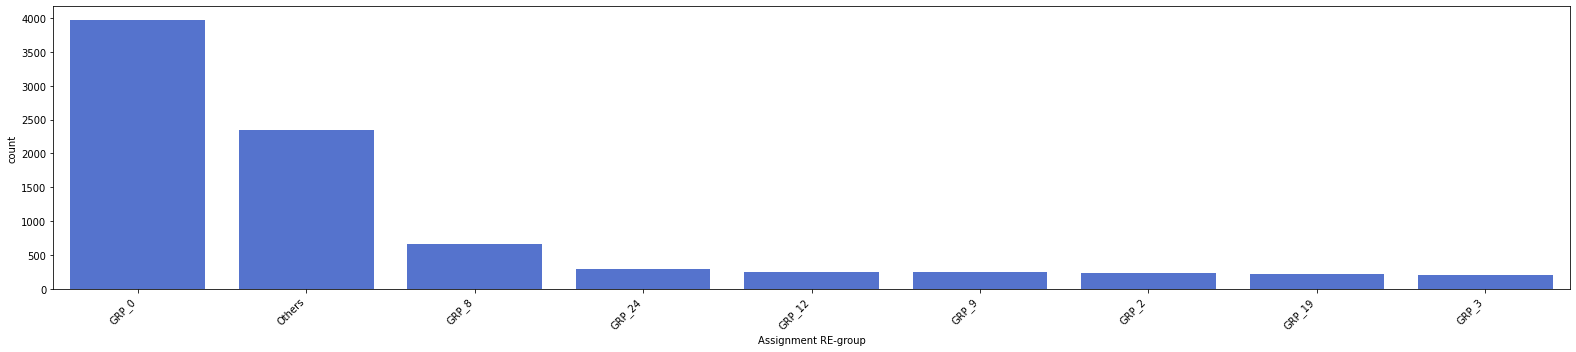

In [8]:
# Visualising the Distribution after re-classifing the groups in 'Others'.
plt.subplots(figsize=(22,5))
descending_order = df['Assignment RE-group'].value_counts().sort_values(ascending=False).index
ax=sns.countplot(x='Assignment RE-group', data=df, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [9]:
df.shape

(8437, 9)

In [10]:
# df2 = df.drop_duplicates(subset = 'Cleaned',keep= 'first')
# df2.shape

In [11]:
# type(df2)

In [12]:
df.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group',
       'SC + DC + Caller', 'Assignment RE-group', 'Cleaned', 'Length',
       'Language'],
      dtype='object')

In [13]:
df['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_49', 'GRP_50', 'GRP_51',
       'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_48', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [14]:
df['Assignment RE-group'].unique()

array(['GRP_0', 'Others', 'GRP_3', 'GRP_8', 'GRP_9', 'GRP_12', 'GRP_19',
       'GRP_2', 'GRP_24'], dtype=object)

In [15]:
df.shape

(8437, 9)

In [16]:
df[df['Language'] != 'en'].shape[0]

657

In [17]:
df1 = df[df['Language'] == 'en']
df1.shape

(7780, 9)

In [18]:
df1 = df1[df1['Assignment RE-group'] != 'Others']
df1.shape

(5668, 9)

In [19]:
# df1 = df1[df1['Assignment RE-group'] != 'GRP_0']
df1.shape

(5668, 9)

In [20]:
labels_ = df1['Assignment RE-group'].unique()
print(labels_)
print(df1['Assignment RE-group'].nunique())

['GRP_0' 'GRP_3' 'GRP_8' 'GRP_9' 'GRP_12' 'GRP_19' 'GRP_2' 'GRP_24']
8


In [21]:
df1['Length'].describe()

count    5668.000000
mean       26.556104
std        54.662342
min         2.000000
25%         5.000000
50%        14.000000
75%        29.000000
max      1033.000000
Name: Length, dtype: float64

# BERT 

In [22]:
!pip install tensorflow-gpu >> /dev/null

In [23]:
!pip install --upgrade grpcio >> /dev/null

ERROR: tensorflow 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.37.0 which is incompatible.
ERROR: tensorflow-gpu 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.37.0 which is incompatible.


In [24]:
!pip install tqdm

In [25]:
!pip install bert-for-tf2

     |████████████████████████████████| 51kB 4.2MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-cp37-none-any.whl size=30535 sha256=34532f9d9ac80492eaa56fc13625d54fb2b4696927d90370f854750456d91332
  Stored in directory: /root/.cache/pip/wheels/a1/04/ee/347bd9f5b821b637c76411d280271a857aece00358896a230f
  Created wheel for py-params: filename=py_params-0.10.2-cp37-none-any.whl size=7912 sha256=738abe87043f924d9f5b8603b6a570bed60805396c6ab9f5507c1ea2a522a0f8
  Stored in directory: /root/.cache/pip/wheels/d0/4a/70/ff12450229ff1955abf01f365051d4faae1c20aef53ab4cf09
  Created wheel for params-flow: filename=params_flow-0.8.2-cp37-none-any.whl size=19472 sha256=23e02c9712a64494fa1002f2a35e059f93d6af8d877ae071b9021874a3e978dc
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow


In [26]:
!pip install sentencepiece 

     |████████████████████████████████| 1.2MB 6.4MB/s 


In [27]:
import os
import math
import datetime

from tqdm import tqdm

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

import bert
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert.tokenization.bert_tokenization import FullTokenizer

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [28]:
df1.head()

,Short description,Description,Caller,Assignment group,SC + DC + Caller,Assignment RE-group,Cleaned,Length,Language
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issuespxjnwir pjlcoqds-verified user det...,GRP_0,login issue verify user detail employee manage...,36,en
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlookhmjdrvpb komuaywn\r\n\r\nreceived from:...,GRP_0,outlook hello team meeting skype meeting appea...,24,en
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpneylqgodm ybqkwiam\r\n\r\nrec...,GRP_0,log vpn log vpn good,12,en
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,xbkucsvz gcpydtequnable to access hr_tool page,GRP_0,unable access hr tool page,6,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,owlgqjme qhcozdfxskype error,GRP_0,skype error,2,en


In [29]:
df2 = df1[['Cleaned','Assignment RE-group']]

In [30]:
df2.shape

(5668, 2)

In [31]:
df2.head(2)

,Cleaned,Assignment RE-group
0,login issue verify user detail employee manage...,GRP_0
1,outlook hello team meeting skype meeting appea...,GRP_0


In [32]:
train = df2.sample(frac = 0.8)
print(train.shape)

(4534, 2)


In [33]:
test = df2.drop(train.index)

In [34]:
test.shape

(1134, 2)

In [35]:
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip

--2021-04-28 04:35:33--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip’

uncased_L-12_H-768_ 100%[===================>] 388.84M  96.5MB/s    in 4.0s    

2021-04-28 04:35:38 (96.5 MB/s) - ‘uncased_L-12_H-768_A-12.zip’ saved [407727028/407727028]



In [36]:
!unzip uncased_L-12_H-768_A-12.zip

Archive:  uncased_L-12_H-768_A-12.zip
   creating: uncased_L-12_H-768_A-12/
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: uncased_L-12_H-768_A-12/bert_config.json  


In [37]:
# %cd /content/drive/MyDrive/k/NLP/capstone/BERT/

In [38]:
# !mv "/content/drive/MyDrive/k/NLP/capstone/BERT/model/uncased_L-4_H-512_A-8" "/content/drive/MyDrive/k/NLP/capstone/BERT"

In [39]:
# %cd /content/drive/MyDrive/k/NLP/capstone/BERT/uncased_L-4_H-512_A-8

In [40]:
# !unzip uncased_L-4_H-512_A-8.zip

In [41]:
# %cd /content/drive/MyDrive/k/NLP/capstone/BERT

In [42]:
os.makedirs("model", exist_ok=True)

In [43]:
!mv uncased_L-12_H-768_A-12/ model

In [44]:
bert_model_name="uncased_L-12_H-768_A-12"

bert_ckpt_dir = os.path.join("model/", bert_model_name)
bert_ckpt_file = os.path.join(bert_ckpt_dir, "bert_model.ckpt")
bert_config_file = os.path.join(bert_ckpt_dir, "bert_config.json")

In [45]:
class Data:
  DATA_COLUMN = "Cleaned"
  LABEL_COLUMN = "Assignment RE-group"

  def __init__(self, train, test, tokenizer: FullTokenizer, classes, max_seq_len=192):
    self.tokenizer = tokenizer
    self.max_seq_len = 0
    self.classes = classes
    
    train, test = map(lambda df: df.reindex(df[Data.DATA_COLUMN].str.len().sort_values().index), [train, test])
    
    ((self.train_x, self.train_y), (self.test_x, self.test_y)) = map(self._prepare, [train, test])

    print("max seq_len", self.max_seq_len)
    self.max_seq_len = min(self.max_seq_len, max_seq_len)
    self.train_x, self.test_x = map(self._pad, [self.train_x, self.test_x])

  def _prepare(self, df):
    x, y = [], []
    
    for _, row in tqdm(df.iterrows()):
      text, label = row[Data.DATA_COLUMN], row[Data.LABEL_COLUMN]
      tokens = self.tokenizer.tokenize(text)
      tokens = ["[CLS]"] + tokens + ["[SEP]"]
      token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
      self.max_seq_len = max(self.max_seq_len, len(token_ids))
      x.append(token_ids)
      y.append(self.classes.index(label))

    return np.array(x), np.array(y)

  def _pad(self, ids):
    x = []
    for input_ids in ids:
      input_ids = input_ids[:min(len(input_ids), self.max_seq_len - 2)]
      input_ids = input_ids + [0] * (self.max_seq_len - len(input_ids))
      x.append(np.array(input_ids))
    return np.array(x)

In [46]:
tokenizer = FullTokenizer(vocab_file=os.path.join(bert_ckpt_dir, "vocab.txt"))

In [47]:
tokenizer.tokenize("unable access hr tool page")

['unable', 'access', 'hr', 'tool', 'page']

In [48]:
tokens = tokenizer.tokenize("unable access hr tool page")
tokenizer.convert_tokens_to_ids(tokens)

[4039, 3229, 17850, 6994, 3931]

In [49]:
def create_model(max_seq_len, bert_ckpt_file):

  with tf.io.gfile.GFile(bert_config_file, "r") as reader:
      bc = StockBertConfig.from_json_string(reader.read())
      bert_params = map_stock_config_to_params(bc)
      bert_params.adapter_size = None
      bert = BertModelLayer.from_params(bert_params, name="bert")
  
        
  input_ids = keras.layers.Input(shape=(max_seq_len, ), dtype='int32', name="input_ids")
  bert_output = bert(input_ids)

  print("bert shape", bert_output.shape)

  cls_out = keras.layers.Lambda(lambda seq: seq[:, 0, :])(bert_output)
  cls_out = keras.layers.Dropout(0.5)(cls_out)
  logits = keras.layers.Dense(units=128, activation="relu")(cls_out)
  logits = keras.layers.Dropout(0.5)(logits)
  logits = keras.layers.Dense(units=len(classes), activation="softmax")(logits)

  model = keras.Model(inputs=input_ids, outputs=logits)
  model.build(input_shape=(None, max_seq_len))


  load_stock_weights(bert, bert_ckpt_file)
        
  return model

In [50]:
classes = train['Assignment RE-group'].unique().tolist()

data = Data(train, test, tokenizer, classes, max_seq_len=30)

4534it [00:02, 1990.59it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
1134it [00:00, 2050.82it/s]

max seq_len 1342


In [51]:
data.train_x.shape

(4534, 30)

In [52]:
data.train_x[0]

array([ 101, 9573,  102,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0])

In [53]:
data.train_y

array([0, 0, 0, ..., 3, 3, 3])

In [54]:
data.max_seq_len

30

In [55]:
np.unique(data.train_y)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [56]:
from sklearn.utils import class_weight
y_train_labels = data.train_y
cw = class_weight.compute_class_weight('balanced',classes=np.unique(y_train_labels),y = y_train_labels)

In [57]:
cw

array([0.18317712, 3.60987261, 1.1335    , 3.09699454, 3.08016304,
       3.22017045, 8.21376812, 3.31432749])

In [58]:
weights = dict()
for i in range(5):
  weights[i] = cw[i]

In [59]:
model = create_model(data.max_seq_len, bert_ckpt_file)

bert shape (None, 30, 768)
Done loading 196 BERT weights from: model/uncased_L-12_H-768_A-12/bert_model.ckpt into <bert.model.BertModelLayer object at 0x7f9bab429f50> (prefix:bert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/embeddings/token_type_embeddings
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weights


In [60]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 30)]              0         
_________________________________________________________________
bert (BertModelLayer)        (None, 30, 768)           108890112 
_________________________________________________________________
lambda (Lambda)              (None, 768)               0         
_________________________________________________________________
dropout (Dropout)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               98432     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 1032  

In [61]:
model.compile(
  optimizer=keras.optimizers.Adam(1e-5),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

In [64]:

log_dir = "log/intent_detection/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%s")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

history = model.fit(
  x=data.train_x, 
  y=data.train_y,
  validation_data=(data.test_x,data.test_y),
  batch_size=16,
  shuffle=True,
  epochs=5,
  callbacks=[tensorboard_callback]
)

Epoch 1/5
284/284 [==============================] - 109s 383ms/step - loss: 0.4404 - acc: 0.8505 - val_loss: 0.6105 - val_acc: 0.8025
Epoch 2/5
284/284 [==============================] - 107s 378ms/step - loss: 0.3716 - acc: 0.8714 - val_loss: 0.5803 - val_acc: 0.8175
Epoch 3/5
284/284 [==============================] - 108s 381ms/step - loss: 0.3197 - acc: 0.8842 - val_loss: 0.6802 - val_acc: 0.8254
Epoch 4/5
284/284 [==============================] - 108s 381ms/step - loss: 0.2572 - acc: 0.9069 - val_loss: 0.8192 - val_acc: 0.8069
Epoch 5/5
284/284 [==============================] - 108s 379ms/step - loss: 0.2278 - acc: 0.9124 - val_loss: 0.9301 - val_acc: 0.8395


In [65]:
 %load_ext tensorboard

In [66]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


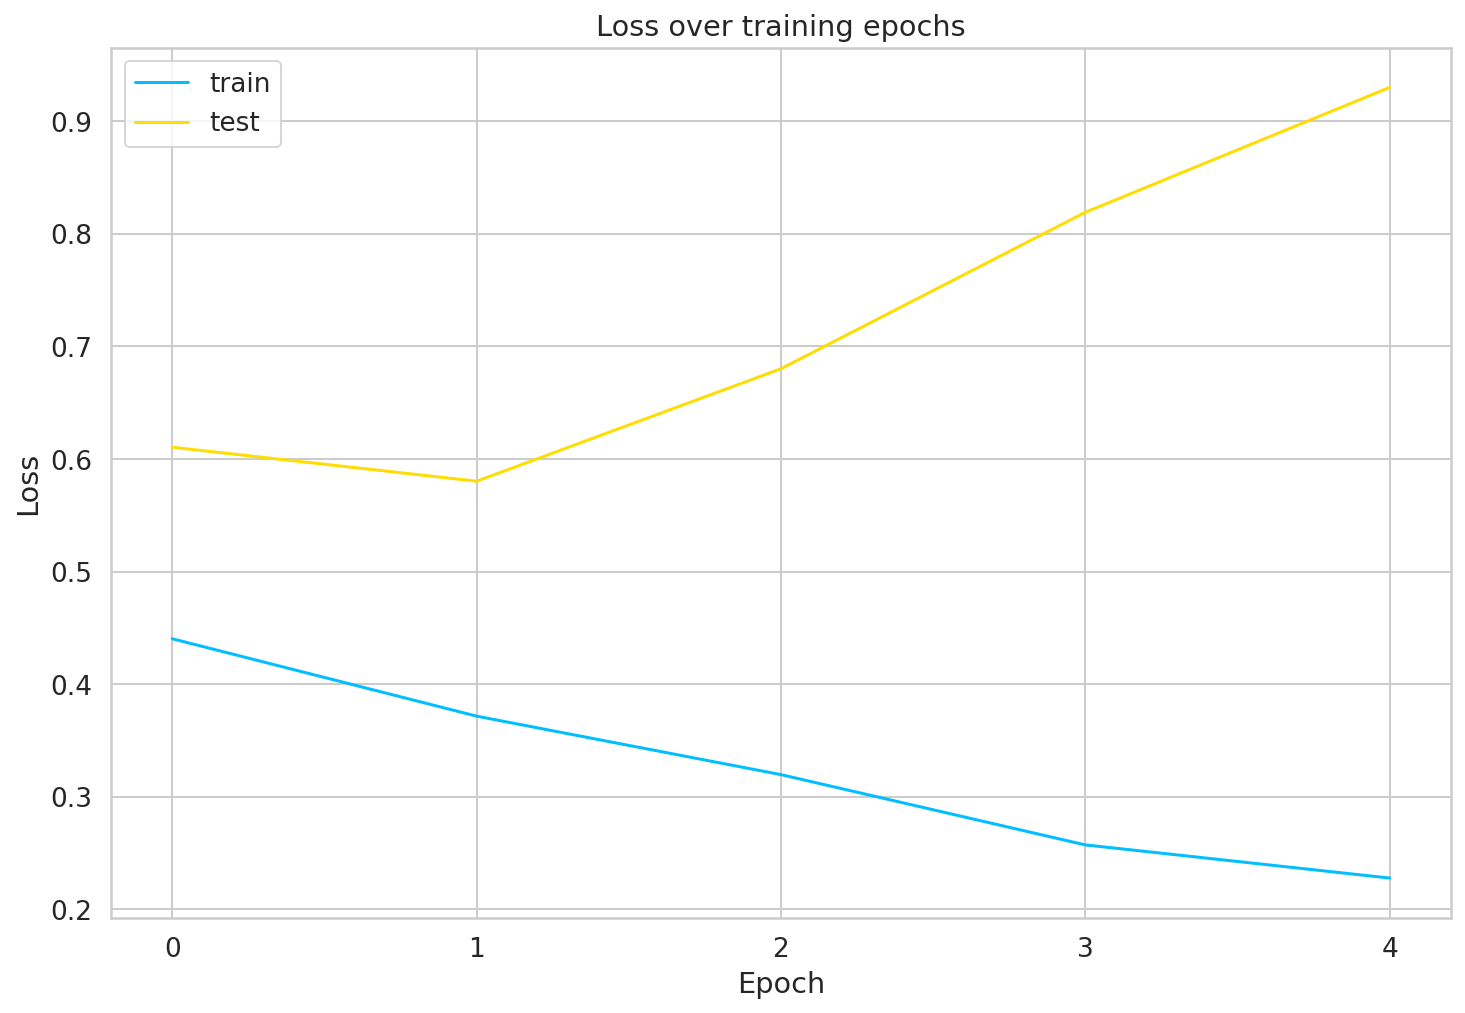

In [67]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Loss over training epochs')
plt.show();

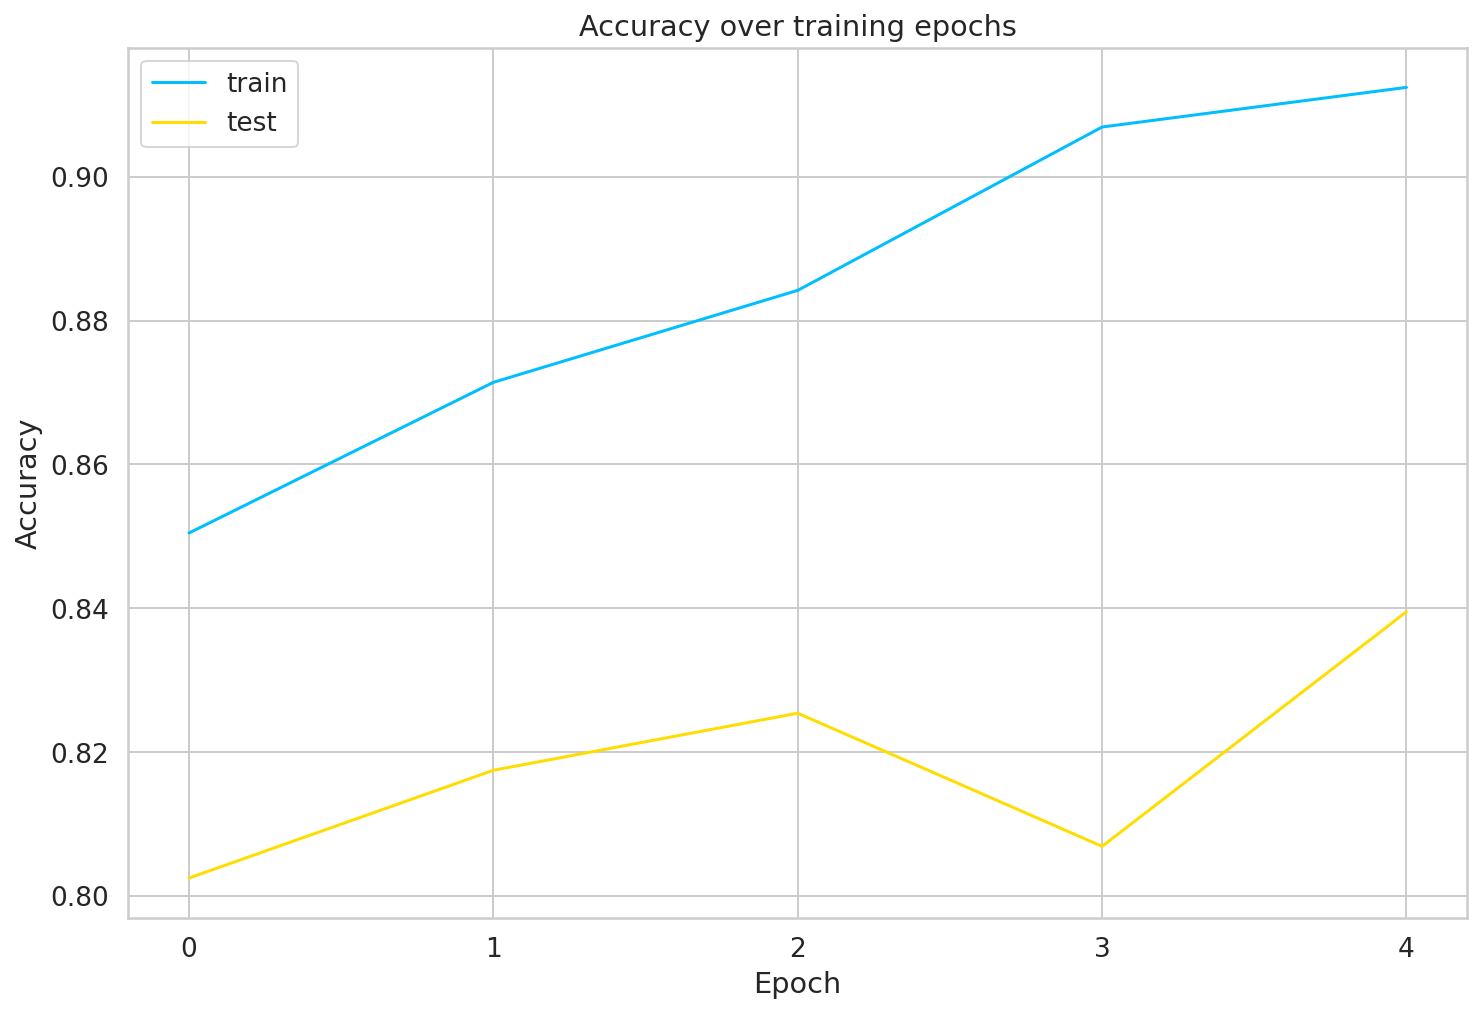

In [68]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Accuracy over training epochs')
plt.show();

In [69]:
train_acc = model.evaluate(data.train_x, data.train_y)
test_acc = model.evaluate(data.test_x, data.test_y)

print("train acc", train_acc)
print("test acc", test_acc)

36/36 [==============================] - 4s 114ms/step - loss: 0.9301 - acc: 0.8395
train acc [0.11920486390590668, 0.9554477334022522]
test acc [0.9301313161849976, 0.8395061492919922]


In [70]:
y_pred = model.predict(data.test_x).argmax(axis=-1)

In [71]:

print(classification_report(data.test_y, y_pred, target_names=classes))

              precision    recall  f1-score   support

       GRP_0       0.86      0.97      0.91       753
       GRP_3       0.52      0.26      0.34        43
       GRP_8       0.85      0.93      0.89       129
       GRP_2       0.77      0.43      0.55        56
      GRP_12       0.73      0.67      0.70        45
       GRP_9       0.80      0.18      0.29        45
      GRP_24       0.89      0.85      0.87        20
      GRP_19       0.57      0.28      0.37        43

    accuracy                           0.84      1134
   macro avg       0.75      0.57      0.62      1134
weighted avg       0.82      0.84      0.82      1134



In [72]:
cm = confusion_matrix(data.test_y, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)

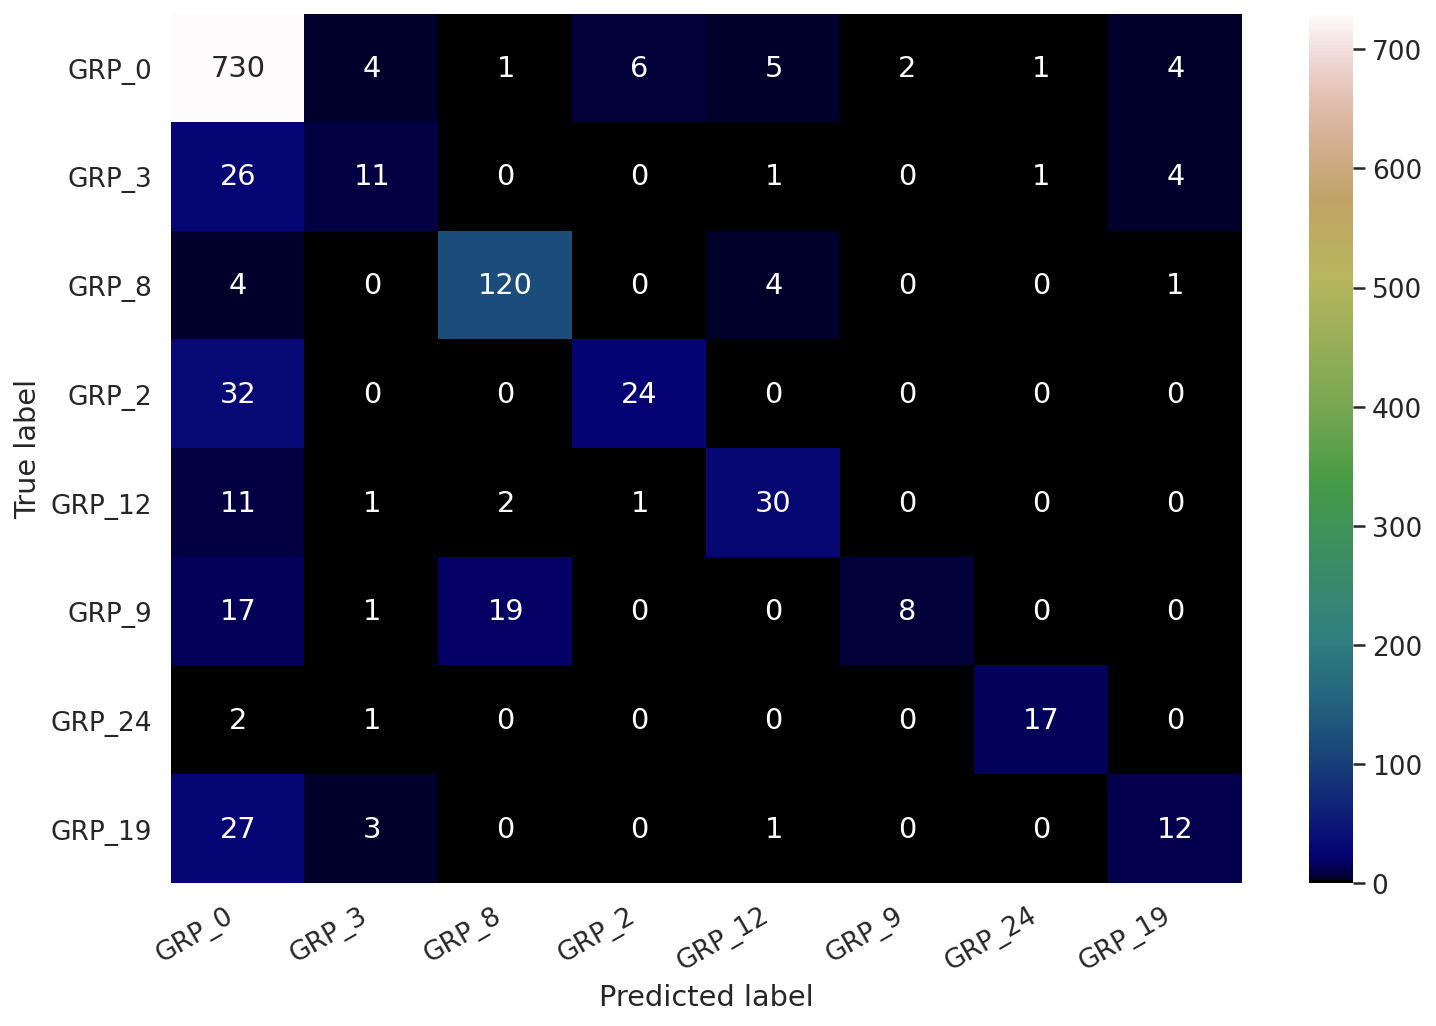

In [73]:
hmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap='gist_earth')
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [74]:
uni_e,counts = np.unique(data.test_y,return_counts=True)

In [75]:
print(uni_e)
print(counts)

[0 1 2 3 4 5 6 7]
[753  43 129  56  45  45  20  43]
